In [114]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Import the dataset
df = pd.read_csv("diabetes_dirty.csv")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [115]:
# Informaion about the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    float64
 9   S6           442 non-null    int64  
 10  PROGRESSION  442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [116]:
# Statistics
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [117]:
# Shape of the data
df.shape

(442, 11)

In [118]:
# Columns in the dataframe
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6',
       'PROGRESSION'],
      dtype='object')

In [119]:
# Checking for missing values
df.isnull().sum()

AGE            0
SEX            0
BMI            0
BP             0
S1             0
S2             0
S3             0
S4             0
S5             0
S6             0
PROGRESSION    0
dtype: int64

In [131]:
# Differentiate between the independent and dependent variables
X = df.drop('PROGRESSION', axis=1).values
y = df['PROGRESSION'].values

# Reshaping X and y to have the same number of samples
X = X.reshape(-1,X.shape[1])
y = y.reshape(-1,1)

In [132]:
# Create an empty linear regression model
model = LinearRegression()

# Create the model
model.fit(X,y)

LinearRegression()

In [133]:
# Get intercept and coefficients
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [-334.56713852]
Coefficients: 
 [[-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
  -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
   6.84831250e+01  2.80116989e-01]]


In [134]:
# Split data into training and test sets
rseed = 23
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=rseed)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (331, 10) (331, 1)
Test data: (111, 10) (111, 1)


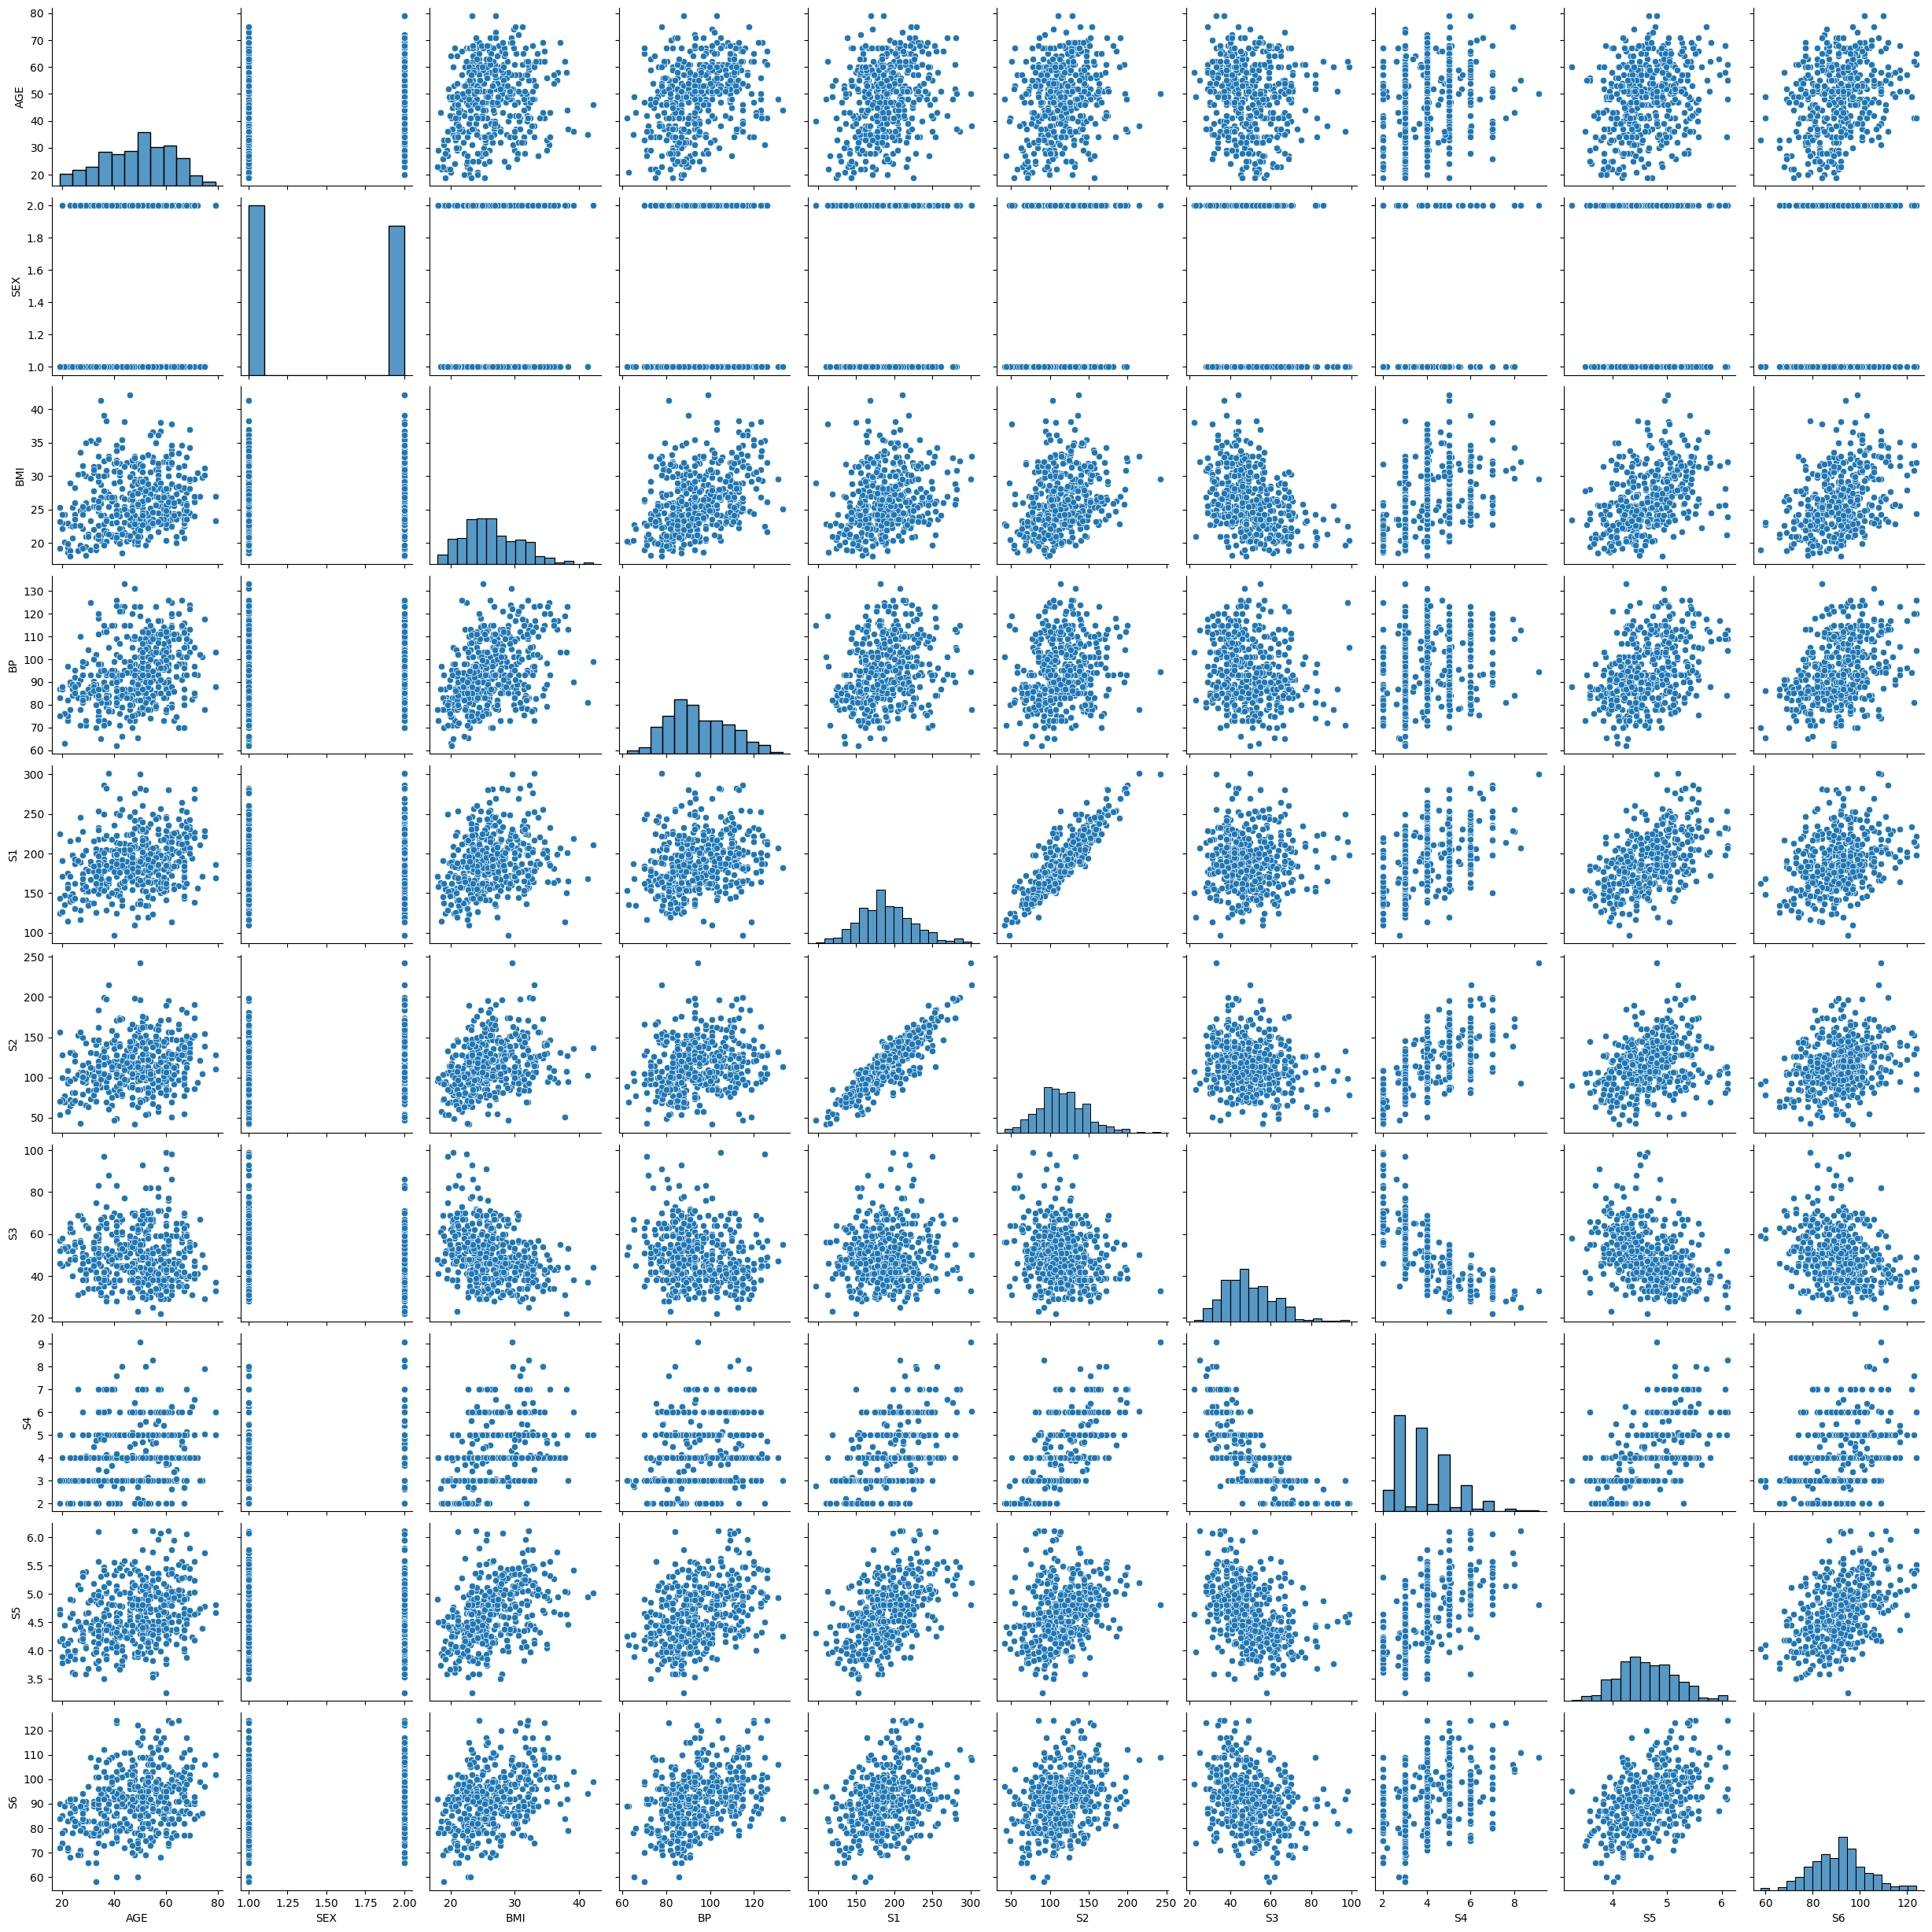

In [135]:
# Visualising the distribution of the data
sns.pairplot(data=df.drop('PROGRESSION', axis=1))

The data generally follows a Gaussian distribution therefore Standardisation should be used for this data.

In [136]:
# Fit the scaler on train data
sc = StandardScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [137]:
# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 [147.99697885]
Coefficients: 
 [[ -0.475283   -13.26721899  25.26242714  13.56306674 -44.1474133
   27.83359715   8.09177442   9.86771171  38.17288192   4.2377974 ]]


In [138]:
# Predictions
predictions[0:5]

array([[295.11727842],
       [126.41908845],
       [143.50124367],
       [ 29.7492148 ],
       [201.39539886]])

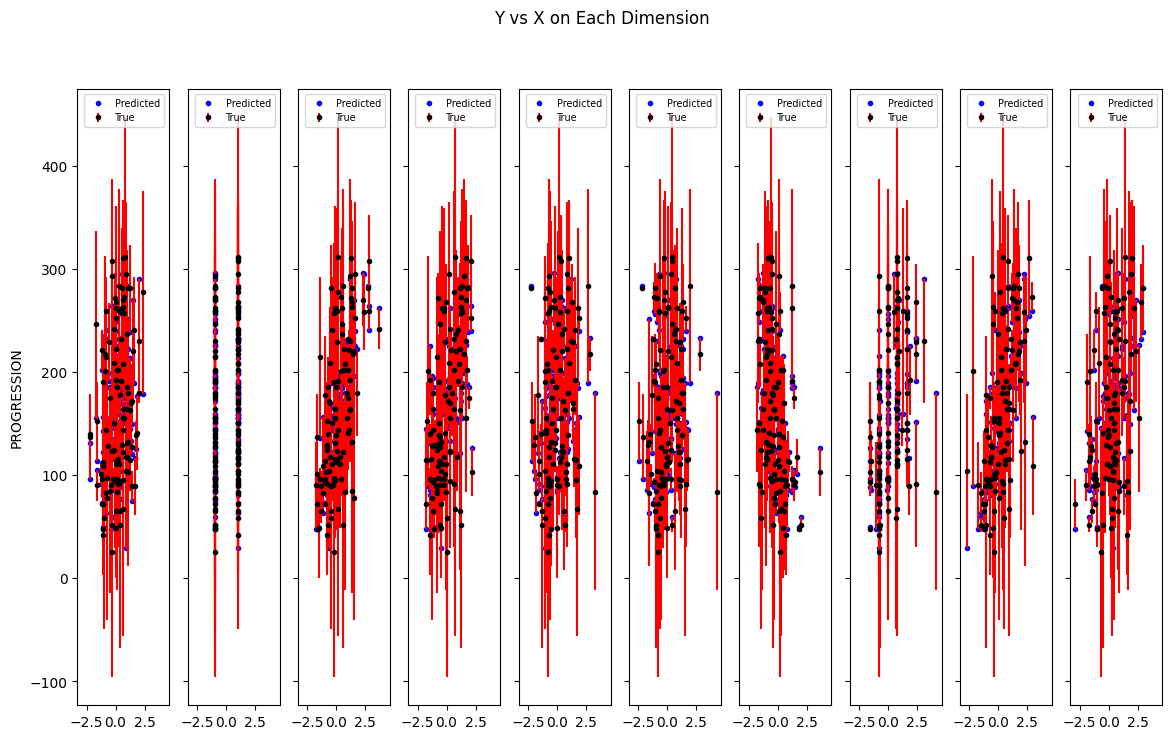

In [139]:
# Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(14,8))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(df.columns[-1])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

Some of the black (predicited values) and blue (actual values) dots are closely aligned and others have significant gaps. This indicates moderately accurate predictions. The error lines have a range of lengths which suggests that there are instances where the model's predictions are not very accurate and there are instances where the model accurately predicts.  

In [140]:
# R squared score
print ("R2 Score:", round (model.score(X_test, y_test), 4))

R2 Score: 0.4717


The R-Squared score is close to 0.5, which suggests that the model accounts for roughly half of the variability in the outcome and fits the observations moderately.